imm sa# Exploring Employee Attrition Data

# 3 Levels for Data Exploration

* Level 0 : Understanding Data
* Level 1 : Univariate Analysis
* Level 2 : Bi-Variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from data 

## Level 0 Tasks : Understanding Data

1.Visually inspect the first few and last few rows of the data \
2.Check the shape of the data frame \
3.Check the count of null values in each column \
4.Inspect all the column names and cross check with the data dictionary \
5.Check the information of the data frame using the info() function 

### Importing the necessary libraries 

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Checking the library versions 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2
Matplotlib version:  3.5.2


### Reading the file

In [5]:
df = pd.read_csv("DS1_C6_S2_EmployeeAttrition_Data_Concept.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,8,Y,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,1,Y,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,6,Y,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,1,Y,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,9,Y,No,3,4,6,3,3,2,2,2,2


##  Number of rows and columns 

In [6]:
df.shape

(1470, 27)

## Display the names of all the columns

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Displaying the dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

## Checking if there are null values in any columns

In [9]:
df.isnull().sum()       # isnull returns the True/False dataframe
                        #sum: counts the number of True in columns

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify if the type data in each column is categorical or numerical?
1. Separate out the categorical columns from the numerical types

### These are the kind of analyses that can be performed on categorical data
1. Check if it is Nominal or Ordinal 
2. Check how many categories are present
3. Check the Mode 
4. Check for Missing values 
5. Think about how the missing values could be treated
6. Think about the kind of graph/chart that can be plotted using this data

Note: We are analyzing only one column at a time (Univariate Analysis).

## Separating Categorical and Numerical Variables

In [10]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 40:       # nunique:  returns unique values in the column,
                                                    #here 50 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

### User defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

## 1. Analysis of Attrition

In [12]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


###### Attrition is a nominal datatype.

### Visual presentation of Attrition attribute

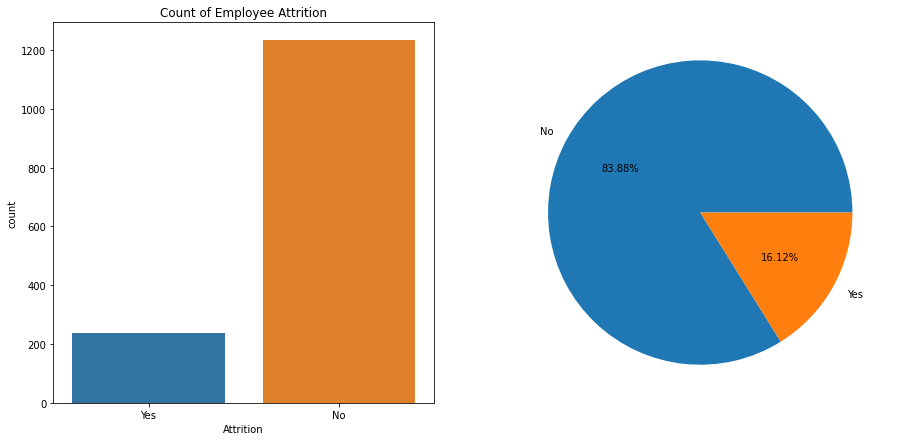

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Employee Attrition")                  # Set the title of the graph
percentage = df["Attrition"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Attrition"], ax = ax[0])plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## ***Interpretation:  The dataset indicates that 16.12% of the employee left the organisation while 83.88% of the employee are still with it.

## 2. Analysis of  Gender column: Gender of a employee (Male or Female)

In [14]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


###### Gender is a nominal datatype (Categorical).

###    Optional::Way to fill: Mode of the Gender Column

Note: Mode is not the perfect way to fill the missing value in this case. One might need to handle such a situation with caution. This is for demonstration purposes only.

In [15]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True)

Male


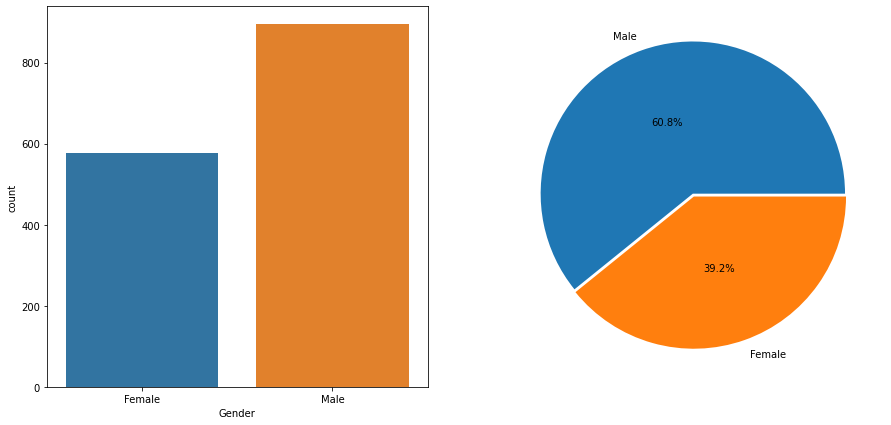

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["Gender"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

## ***Interpretation: Male Employees are more in number, contributing to 60.8%.

## 3. Analysis of  Marital Status: Finding the Marital Status of the employees.


In [17]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


In [18]:
Maritalstatus_mode = df.MaritalStatus.mode()[0]
print(Maritalstatus_mode)
df["MaritalStatus"].fillna(Maritalstatus_mode, inplace = True)

Married


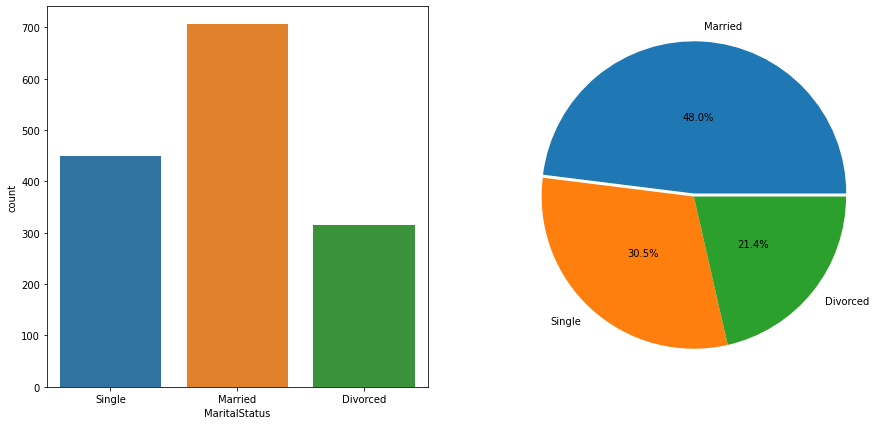

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["MaritalStatus"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["MaritalStatus"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

## ***Interpretation:  The dataset indicates that 48.0% of the employees are married while 30.5% of the employees are single and 21.4% of the employees are Divorced.

## 4.Analysis of Education Field: Finding the employees Educational background.

In [20]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [21]:
Education_field_mode = df.EducationField.mode()[0]
print(Education_field_mode)
df["EducationField"].fillna(Education_field_mode, inplace = True)

Life Sciences


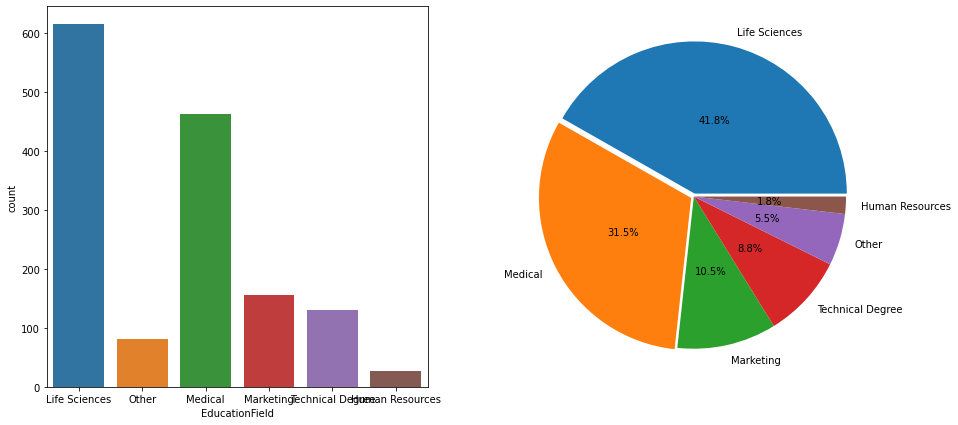

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["EducationField"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["EducationField"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.02, 0.0, 0.0, 0.0, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

## ***Interpretation:  The dataset indicates most number of employees have educational background of Life Sciences and least number of employees have educational background of Human Resources.

##### EnvironmentSatisfaction, WorkLifeBalance, and NumCompaniesWorked are an ordinal datatype (Categorical) as it has a hierarchy in it.

## 5. Analysis of Number of Companies Worked: Number of companies changed by an employee. 

In [23]:
info_of_cat("NumCompaniesWorked")

Unique values in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
Mode of NumCompaniesWorked is 1
Number of missing values in NumCompaniesWorked is 0


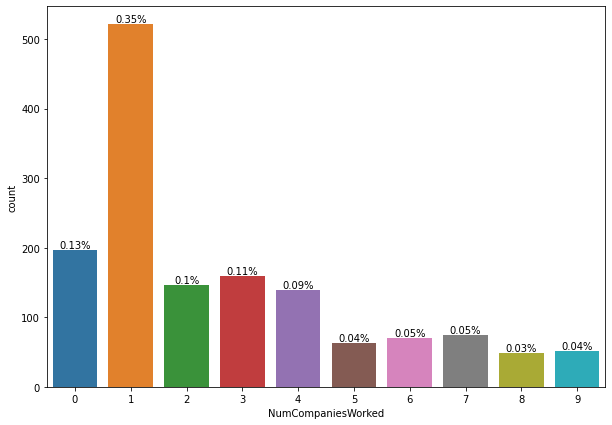

In [24]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NumCompaniesWorked"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: 35% of the employees have worked with only 1 company in the past and 13% of the employees have never worked with any company in the past.

## 6. Analysis of Environment Satisfaction: Company Environment statisfaction of an employee. 

In [25]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


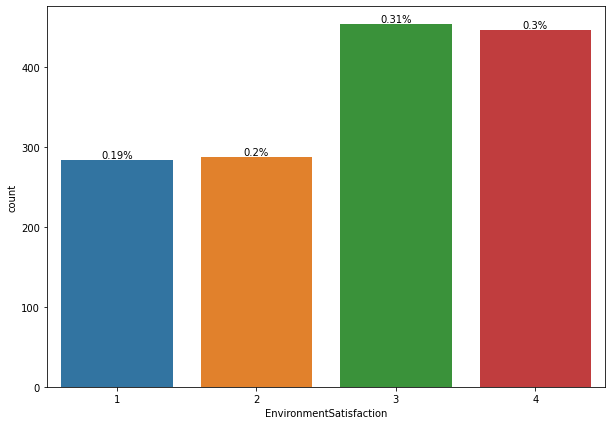

In [26]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["EnvironmentSatisfaction"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: 61% of employees have rated company environmental satisfaction 3 and 4 out of 4.

## 7. Analysis of Work life Balance: Work life balance of an employee. 

In [27]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


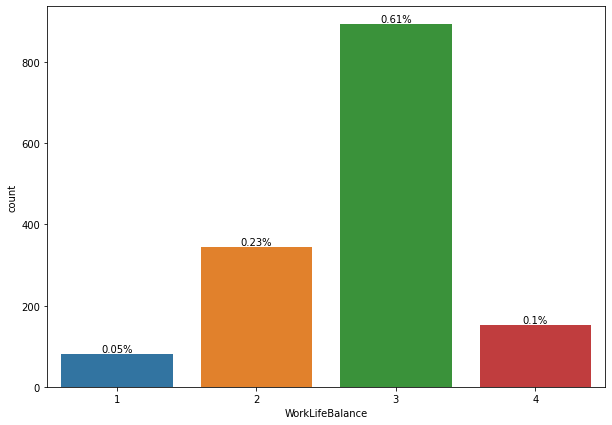

In [28]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["WorkLifeBalance"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: 61% of employees have rated the work life balance as 3 out of 4

## 8. Analysis of Distance From Home: Employee work location distance from home. 

In [29]:
info_of_cat("DistanceFromHome")

Unique values in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Mode of DistanceFromHome is 2
Number of missing values in DistanceFromHome is 0


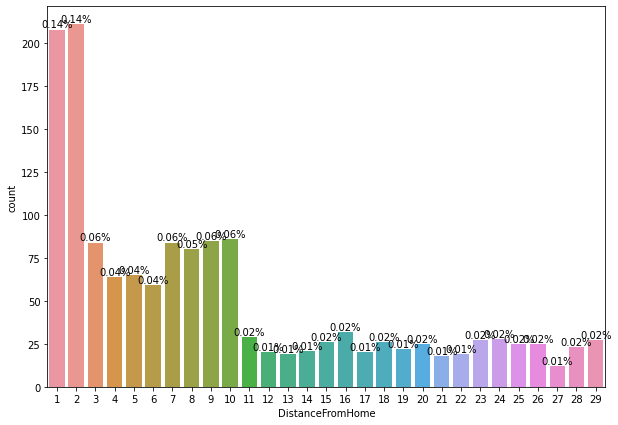

In [30]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["DistanceFromHome"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: Alomost 70% of employees reside within the of distance 10.

## 9. Analysis of Over time: Over time done by the employees.

In [31]:
info_of_cat("OverTime")

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


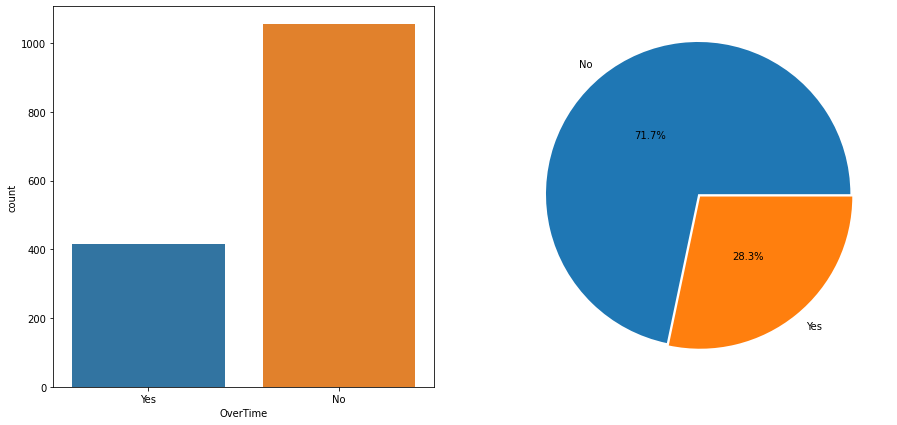

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["OverTime"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["OverTime"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

## ***Interpretation: 71.7% of employees have never done an over time while 28.3% employees have done an over time. 

## 10. Analysis of Years In Current Role : Number of employees working in same role over the period of time.

In [33]:
info_of_cat("YearsInCurrentRole")

Unique values in YearsInCurrentRole are: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Mode of YearsInCurrentRole is 2
Number of missing values in YearsInCurrentRole is 0


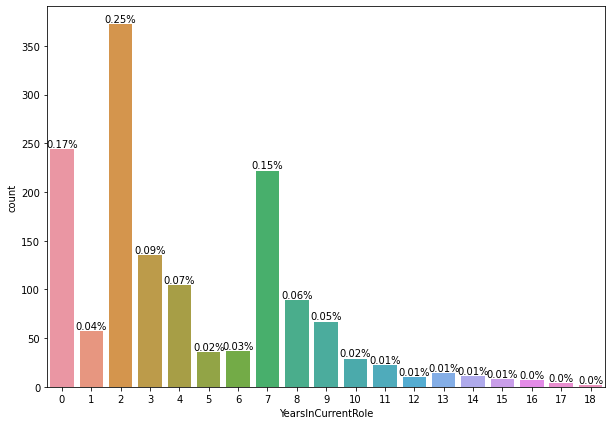

In [34]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["YearsInCurrentRole"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: More than 50% of employees have stuked in same role, year ranging between 0 to 3 year. 25% of employees stuked in same role from last 3 years.

## 11. Analysis of Years at Company : Employees tenure with the company. 

In [35]:
info_of_cat("YearsAtCompany")

Unique values in YearsAtCompany are: [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Mode of YearsAtCompany is 5
Number of missing values in YearsAtCompany is 0


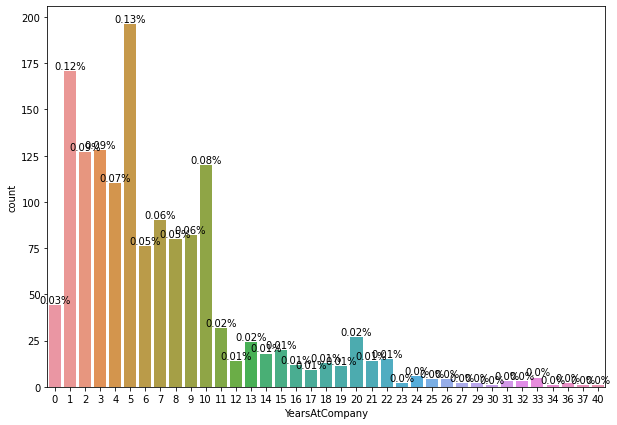

In [36]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["YearsAtCompany"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: Very few employees are having tenurity more than 20 years. However, there are some cases where the tenurity is greater than 20, which is abnormal. Hence, data clearing might be required. 

## Outliers Analysis and Treatment:
Employees whose tenurity greater than 20 years are replaced with the mean of the population.

In [37]:
# Making changes in data
mean = int(df.YearsAtCompany.mean())
# accessing the data higher than 5
x = df[df["YearsAtCompany"] > 20].index
for index in x:
    df.loc[index, "YearsAtCompany"] = mean

In [38]:
info_of_cat("YearsAtCompany")

Unique values in YearsAtCompany are: [ 6 10  0  8  2  7  1  9  5  4  3 12 14 15 17 11 13 16 20 19 18]
Mode of YearsAtCompany is 5
Number of missing values in YearsAtCompany is 0


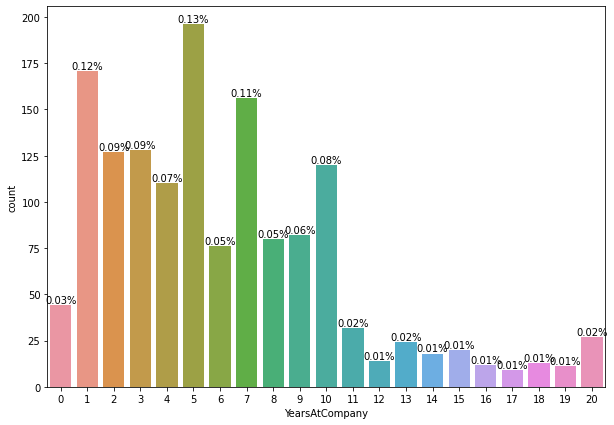

In [39]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["YearsAtCompany"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation: More than 50% of employees have stayed with the company, year ranging between 0 to 5 year. 13% of employees have tenurity of 5 years.

## Here you will find more questions about the employees who have left the company by relating the "attrition flag" column with each and every categorical column mentioned above.

1. Genderwise count of employees who are with the company and those who have left.
2. Is there a connection between the education field and the employees who have left the company?
3. Marital Status analysis of those employees who have left the company
4. Income category analysis of the employees who have left the company
5. Environment Satisfaction analysis of the employee who have left the company
6. Job Satisfaction analysis of the employees who have left the company
7. Over Time analysis of the employees who have left the company
8. Work Life Balance of the employees who have left the company
9. Distance From Home of the employees who have left the company
10. Years In Current Role of the employees who have left the company
11. Number of Companies Worked of the employees who have left the company
12. Is there a relation between the attrition and the age of employees who have a lower utilization ratio?
13. Total Working Years of the employees who have left the company
14. Years At Company of the employees who have left the company

Repeat the same analysis with the employees who are still with the Company.

1. Is there a connection between the education field and the existing employees?
2. Marital Status analysis of those employee who are with the company
3. Income category analysis of employees who are with the company
4. Environment Satisfaction analysis of the employees who are still with the company
5. Is there any relation between Distance From Home and existing employees?
6. Is there any relation between existing employees and Job Satisfaction?
7. Is there any relation between existing employees and Work Life Balance?
8. Is there any relation between existing employees and Years In Current Role?
9. Is there any relation between existing employees and Years At Company?

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.


## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

In [40]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

## 12. Analysis of  the employee Age: Age of the Employee

In [41]:
info_of_numerical("Age")

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24


###### Employee Age is a continuous data  (Numerical).

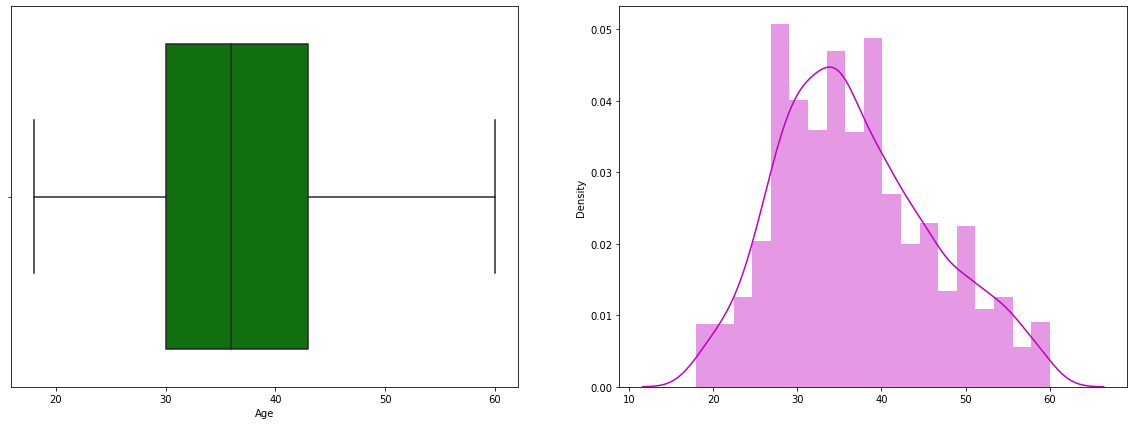

In [42]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## ***Interpretation: Most likely, employees age follows the normal distribution. Most of the employees are in between 28 and 42 years of age.

## 13. Analysis of  the Hourly Rate: Hourly Rate of the employees

In [43]:
info_of_numerical("HourlyRate")

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0


***Treating the missing values in HourlyRate column by with their mean value 

In [44]:
hourlyrate_mean = df.HourlyRate.mean()
print(hourlyrate_mean)
df["HourlyRate"].fillna(hourlyrate_mean, inplace = True)

65.89115646258503


In [45]:
info_of_numerical("HourlyRate")

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0


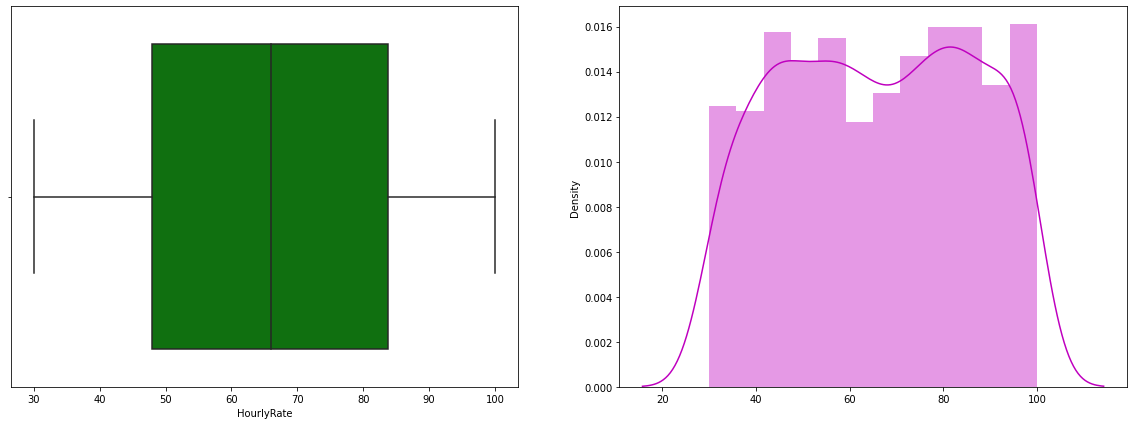

In [46]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## ***Interpretation: Hourly rate follows the normal distribution. Majority of employees are falling between the hourly rate of 45 to 80.

## 14. Analysis of the Monthly Income: Monthly income of the employees

In [47]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0


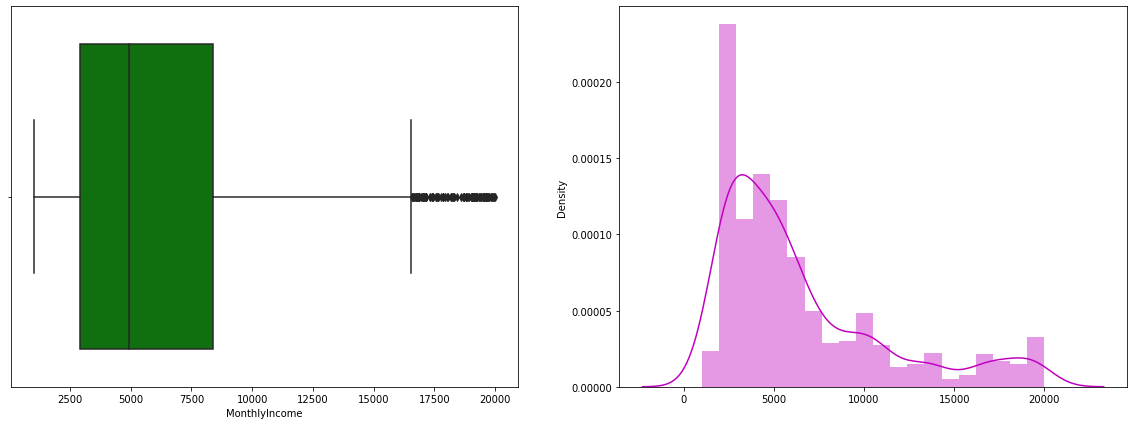

In [48]:
# Distribution of Monthly income.
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

***Outliers Analysis and Treatment : 
Employees who have monthly income above 17000 are outliers. To treat the outliers, their montly income is to replaced by the mean. Though this is not the only solution to treat the outliers, machine learning can help in this scenario.

In [49]:
mean = int(df.MonthlyIncome.mean())
x = df[df["MonthlyIncome"] > 17000].index
for index in x:
    df.loc[index, "MonthlyIncome"] = mean

In [50]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 5698.938095238095
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 6502
The standard deviation of the MonthlyIncome is 3414.879384786381
Number of missing values in the MonthlyIncome is 0


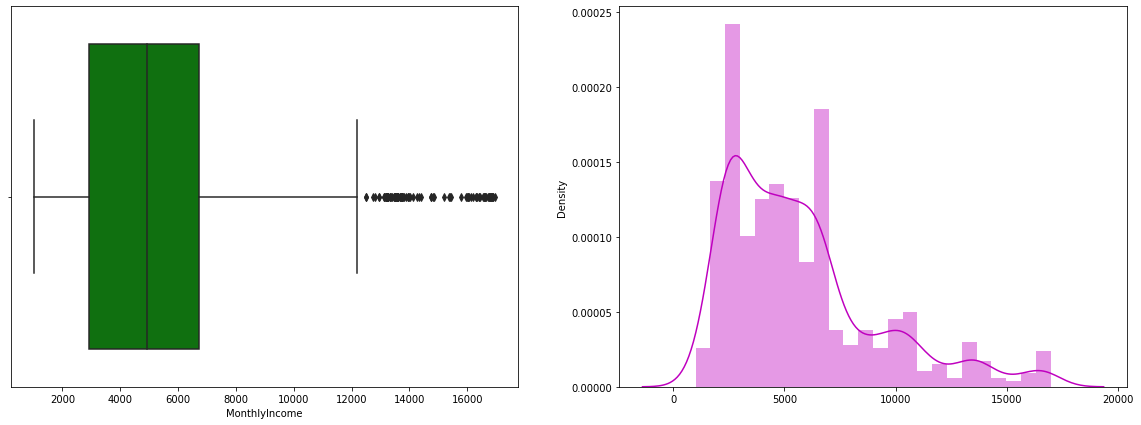

In [51]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## ***Interpretation: Distribution of Monthly income of the employees are positively skewed. Majority of employees monthly incomes are falling between the range of 2500 to 6500.

## 15. Analysis of Total Working Years: Work experience of the employees.

In [52]:
info_of_numerical("TotalWorkingYears")

The mean of the TotalWorkingYears is 11.279591836734694
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 7.780781675515004
Number of missing values in the TotalWorkingYears is 0


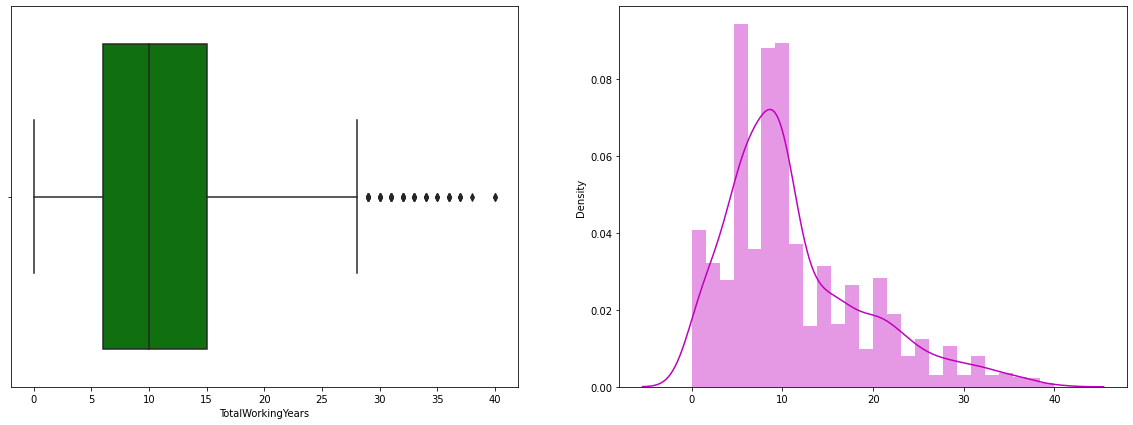

In [53]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["TotalWorkingYears"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TotalWorkingYears"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

***Outliers Analysis and Treatment : 
Employees who have total experience of working above 30 are outliers. To treat the outliers, their work experience is to replaced by the mean.

In [54]:
mean = int(df.TotalWorkingYears.mean())
x = df[df["TotalWorkingYears"] > 30].index
for index in x:
    df.loc[index, "TotalWorkingYears"] = mean

In [55]:
info_of_numerical("TotalWorkingYears")

The mean of the TotalWorkingYears is 10.565986394557823
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 6.63022655977816
Number of missing values in the TotalWorkingYears is 0


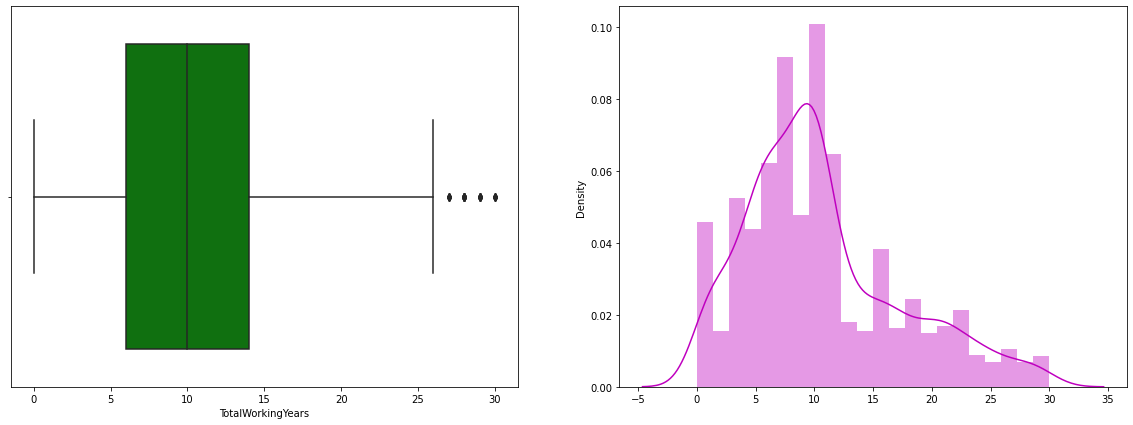

In [56]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["TotalWorkingYears"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TotalWorkingYears"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## ***Interpretation: Distribution of Total work experience of the employees are positively skewed. Majority of employees Total work experience are falling between the range of 5 to 12 years.

Level 2 Analysis (Getting closer to the BIG QUESTION:  Attrition Analysis) 
--------------------------------------------------------------------------------------------------

How can this column make way to further analysis to answer the BIG QUESTION?

What other columns could be clubbed with this Attrition column to ask further questions?

The below are the available list of columns/features in the given data.

In [57]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


## Q16. Relationship of Attrition with Gender

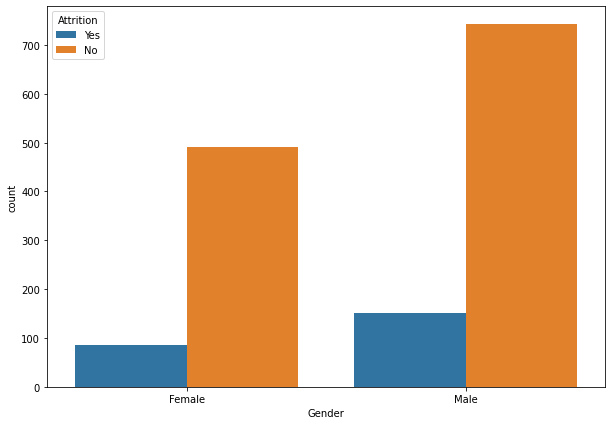

In [58]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Male employee attrition is more as compared to female employee. However, count of male empolyee is aslo more than female employee.

## Q17. Relationship of Attrition with Marital Status.

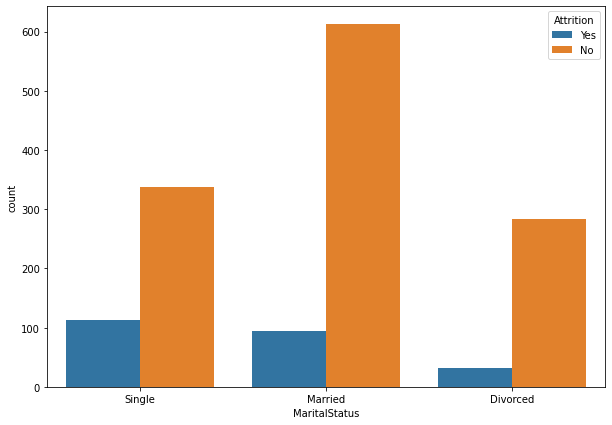

In [59]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "MaritalStatus", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees whose marital status is single have more attrition rate as compare to employees whose marital status is married.

## Q18. Relationship of Attrition with Years At Company.

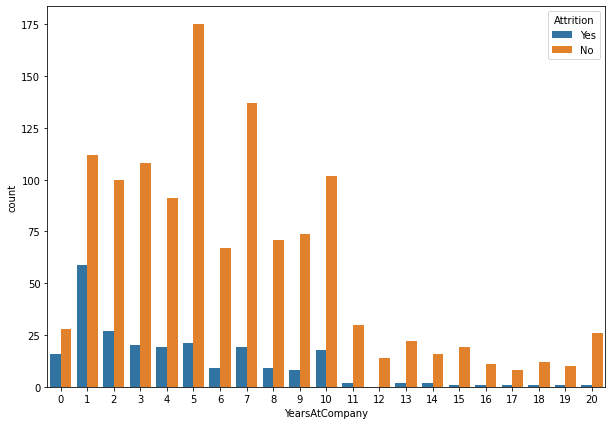

In [60]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "YearsAtCompany", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees who are with the company for less than 3 years have more attrition rate as compare to rest of the employees

## Q19. Relationship of Attrition with Overtime.

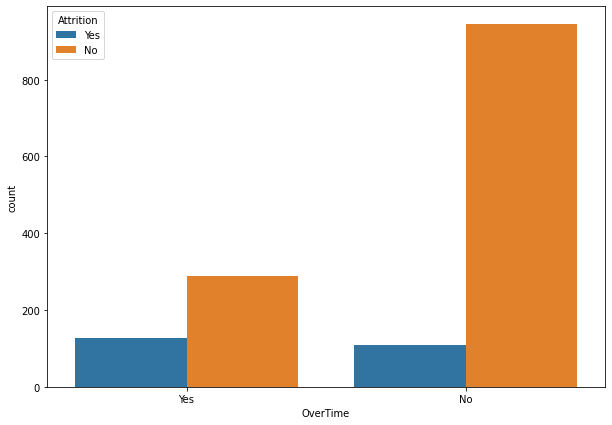

In [61]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "OverTime", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees who are working overtime have more attrition rate than employees who are not working overtime

## Q20. Relationship of Attrition with Monthly Income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

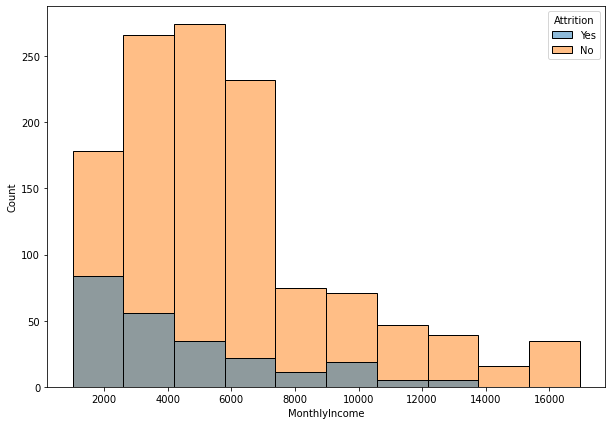

In [62]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data=df, x="MonthlyIncome", hue = "Attrition", bins=10)

## ***Interpretation: Employees whose salary is less than 5000 have more attrition rate than rest of the employees. 

## Q21. Relationship of Attrition with Total Working Experience

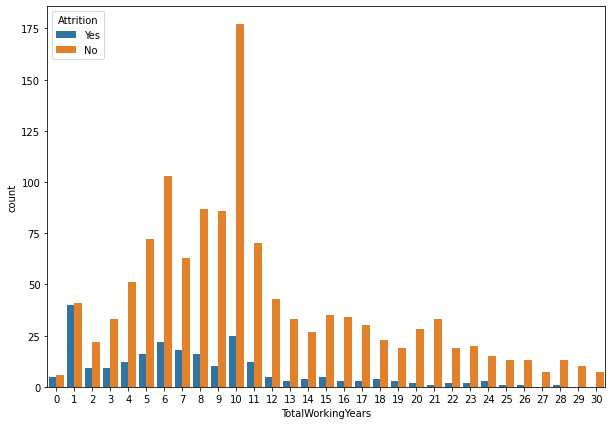

In [63]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "TotalWorkingYears", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees who have less than 2 years of total experience are having more attrition percentage than other employees

## Q23. Relationship of Attrition with Years In CurrentRole

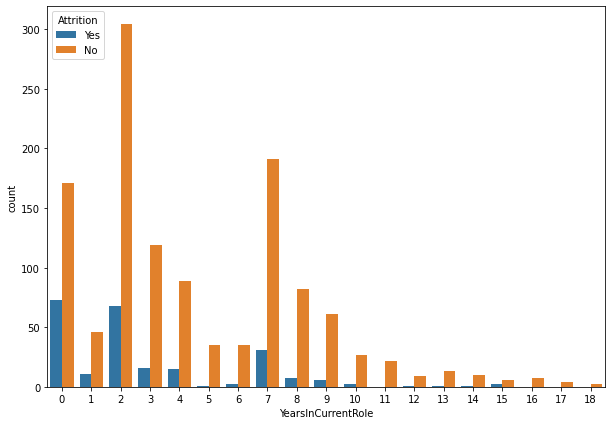

In [64]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "YearsInCurrentRole", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Above figure does not provide any significant conclusion of employees attrition with regards employees working in same role. However, it does indicate employees working in same role from 0 to 2 years have more attrition than other employees.

## Q24. Relationship of Attrition with Distance From Home

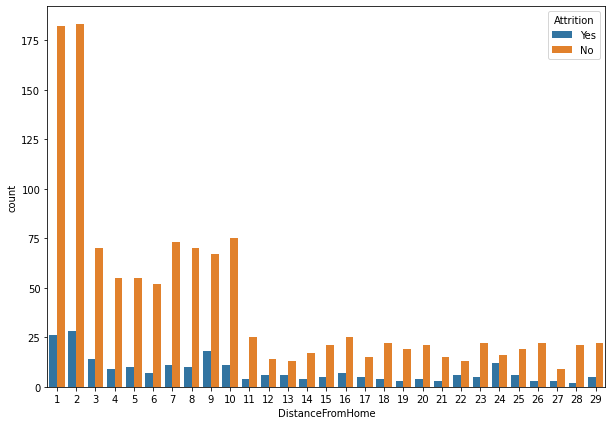

In [65]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "DistanceFromHome", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Above figure does not provide any significant conclusion of employees attrition with regards to Distance From Home.

## Q25. Relationship of Attrition with Education Field

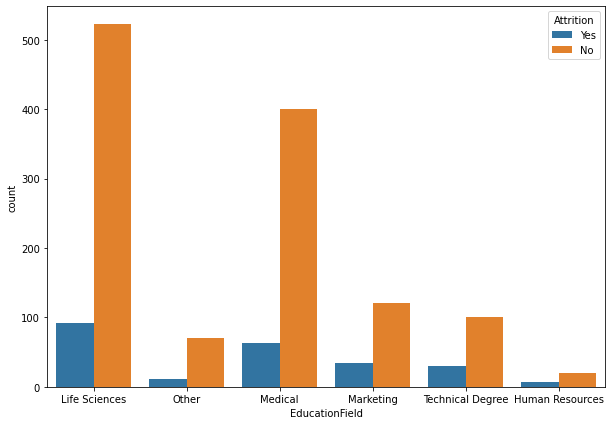

In [66]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "EducationField", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees whose education fields are Life Sciences and Medical have more attrition rate than other employees.

## Q26. Relationship of Attrition with Environment Satisfaction

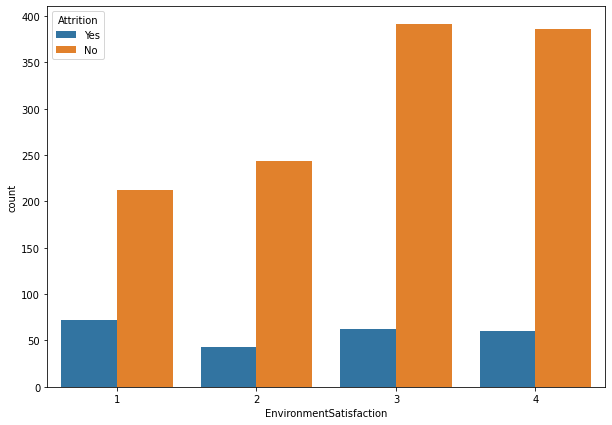

In [67]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "EnvironmentSatisfaction", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees who rated the envrionment statisfaction as 1 have more attrition rate.

## Q27. Relationship of Attrition with Age

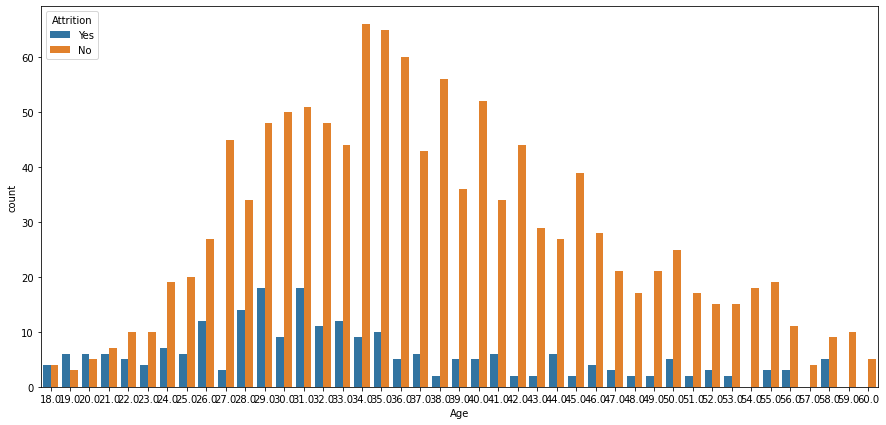

In [68]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "Age", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees aged between 18 to 35 have more attrition than other employees

## Q28. Relationship of Attrition with Performance Rating

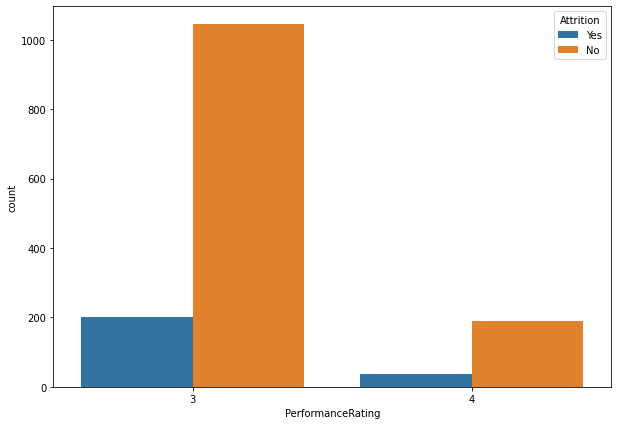

In [69]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "PerformanceRating", hue = "Attrition", data = df)
plt.show()

## ***Interpretation: Employees with performance rating 3 have more attrition rate than employees who have performace rating of 4. However, count of employees with rating 3 is aslo more than employees with performance rating 4.

CAT-NUM ANALYSIS (relationship between categorical and numerical data) 
-----------------------------------------------------------------------------------------------------------

One could ask the following questions about the employees who have left the company by relating 
attrition column, with each and every numerical column mentioned above 

1. Age analysis of the employees who left the company.
2. Monthly Salary analysis of the employees who have left the comapny.
3. Total working years analysis of the employees who left the company.
4. Analysis of hourly rate and the attrition rate of the employees.

Note: We could repeat the same analysis with employee who are still with the company.
1. Age analysis of the employees who are with the company.
2. Monthly Salary analysis of the employees who are with the comapny.
3. Total working years analysis of the employees who are with the company.
4. Analysis of hourly rate and employees who are with the company


A lot more analysis can be carried out this way! 

## Q29. Relationship of Attrition with Montly income
Level 2: Categorical to continuous

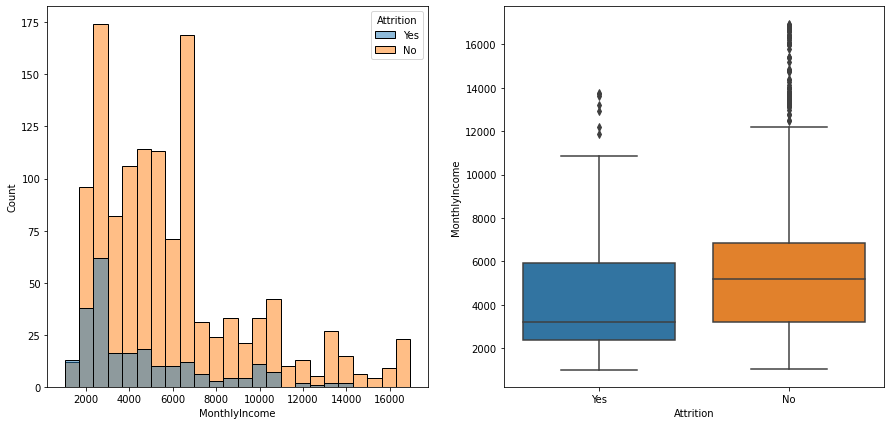

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["MonthlyIncome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["MonthlyIncome"], x = df["Attrition"], ax = ax[1])
plt.show()

## ***Interpretation: Most of employees montly salary is between 2000 to 6000. Aslo the employees who left the company falls in the same salary range.

## Q29. Relationship of Attrition with Age
Level 2: Categorical to continuous

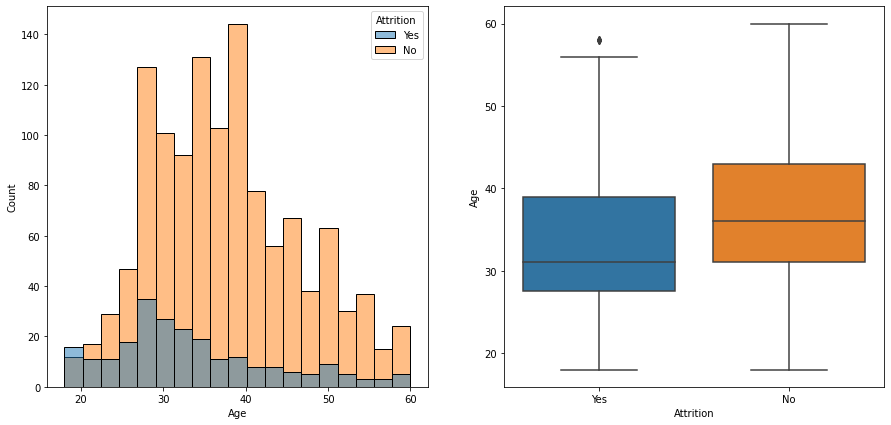

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Age"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["Age"], x = df["Attrition"], ax = ax[1])
plt.show()

## ***Interpretation: Employees aged between 28 to 38 have more attrition than other employees. 

## Q29. Relationship of Attrition with Hourly rate
Level 2: Categorical to continuous

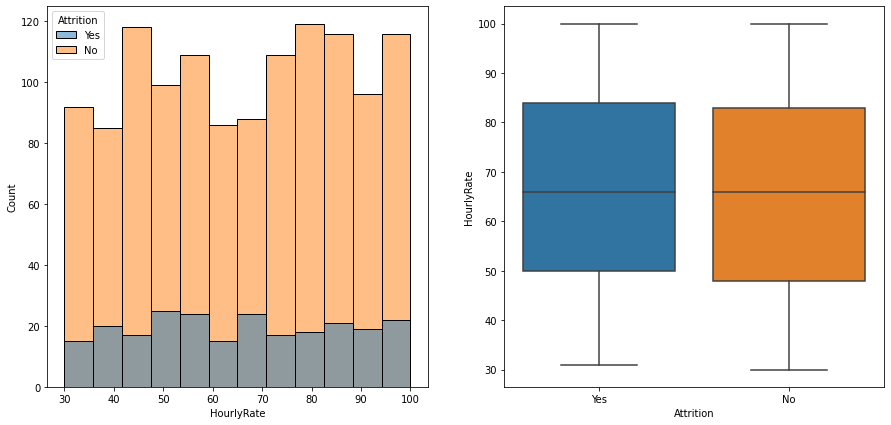

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["HourlyRate"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["HourlyRate"], x = df["Attrition"], ax = ax[1])
plt.show()

## ***Interpretation: Employees hourly rates are normally distributed. Attrition rates are more or less the same.

## Q29. Relationship of Attrition with Total work experience.
Level 2: Categorical to continuous

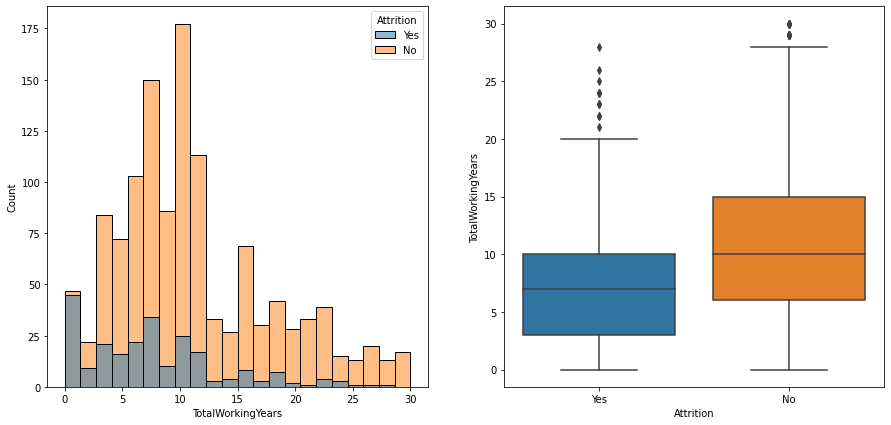

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["TotalWorkingYears"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["TotalWorkingYears"], x = df["Attrition"], ax = ax[1])
plt.show()

## ***Interpretation: Employees whose total work experiene between 3 to 10 have more attrition rate than other employee. 

# Level 3 Further Analysis Questions

## 1. Which age group of Male employees has a higher attrition?

In [74]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,8,Y,Yes,3,1,8,0,1,6,4,0,5


In [75]:
# Create age labels
males = df[(df["Gender"]=="Male") & (df["Attrition"]=="Yes")] # accessing the data using conditional statements where & is a bitwise operator 
bins =     [0,30, 40,   50, 60, 70]                                             # Create the bins
labels =  ["Young", "Adult", "Senior", "Super-Seinor", "old"]                   # setting the labels for the bins 
data = pd.cut(males["Age"], bins = bins, labels = labels)

data = data.value_counts()                                                      # value count is counting the number of values in the column
data

Young           61
Adult           57
Senior          21
Super-Seinor    13
old              0
Name: Age, dtype: int64

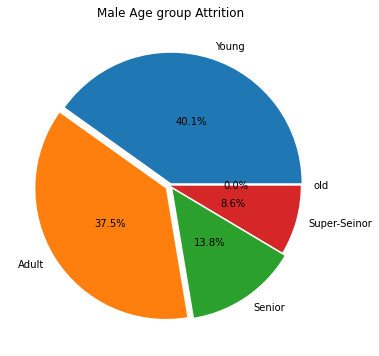

In [76]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index, pctdistance = 0.5, autopct = "%.1f%%") #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Male Age group Attrition")
plt.show()

## ***Interpretation: Yound Male followed by Adult Male in the total male employees attirition have higher attrition. 

## 2. Analyze the attrition of male employees based on their Marital status.

In [77]:
data = df[(df["Gender"]=="Male") & (df["Attrition"]=="Yes")]

data = data["MaritalStatus"] 
data = data.value_counts()
data

Single      69
Married     60
Divorced    23
Name: MaritalStatus, dtype: int64

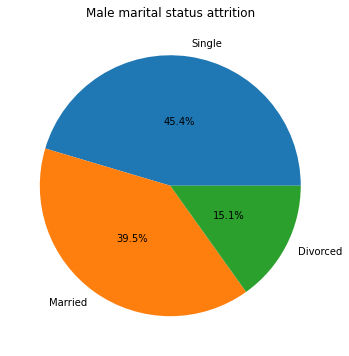

In [78]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels =data.index, pctdistance = 0.5, autopct = "%.1f%%") #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Male marital status attrition")
plt.show()

## ***Interpretation: Single Male followed by Married Male in the total male employees attirition have higher attrition. 

## 3. Analysis of attrition with respect to gender and overtime

In [79]:
data = df[(df["OverTime"]=="Yes") & (df["Attrition"]=="Yes")]

data = data["Gender"] 
data = data.value_counts()
data

Male      81
Female    46
Name: Gender, dtype: int64

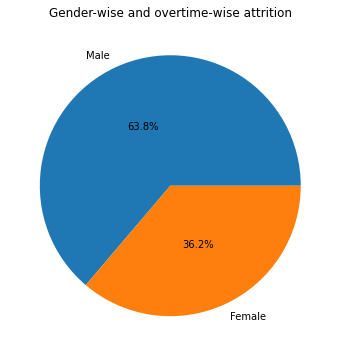

In [80]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels =data.index, pctdistance = 0.5, autopct = "%.1f%%") #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Gender-wise and overtime-wise attrition")
plt.show()

## ***Interpretation: 64% of male employees who have done overtime left the company and 36% of female employees who have done overtime left the company.